# Recreating part of Fig. 5 from "Quantitative imaging of collective cell migration during Drosophila gastrulation: multiphoton microscopy and computational analysis.."

In [111]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

path = '../../CodePass2/runs/'
path = "D:/"
with h5py.File(path+'finale.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]

In [142]:
xx, yy, zz = positions[0, :, 0], positions[0, :, 1], positions[0, :, 2]

important_part = (properties == 1)* (zz >0)* (zz < 10)*(xx> 0) * (xx<20)

cyl = positions[:, important_part, :]

In [118]:
l.shape

(3001, 160)

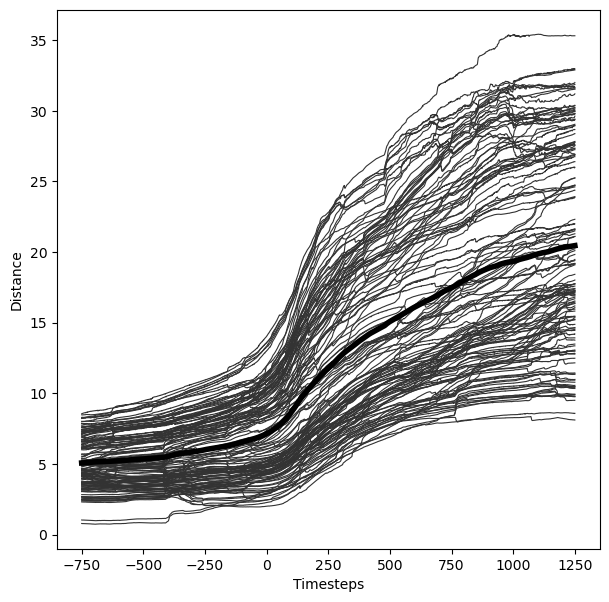

In [166]:
# Transform into cylindrical coordinates

r = np.sqrt(cyl[:, :, 1]**2 + cyl[:, :, 2]**2)
theta = np.arctan2(cyl[:, :, 2], cyl[:, :, 1])
l = cyl[:, :, 0] 


plt.figure(figsize = (7, 7))
# Plot the dimgray
plt.plot([i - 1750 for i in range(len(l))][1000:],(l[:]-l[0])[1000:], c = (0.2,0.2,0.2,1), lw = 0.8, alpha =1.)
#plot average
plt.plot([i - 1750 for i in range(len(l))][1000:], np.mean(l[:]-l[0], axis = 1)[1000:], c = "black", lw = 4, alpha =1.)
plt.xlabel("Timesteps")
plt.ylabel("Distance")
plt.show()

In [24]:
theta.shape

(3001, 1443)

In [ ]:
import seaborn as sns


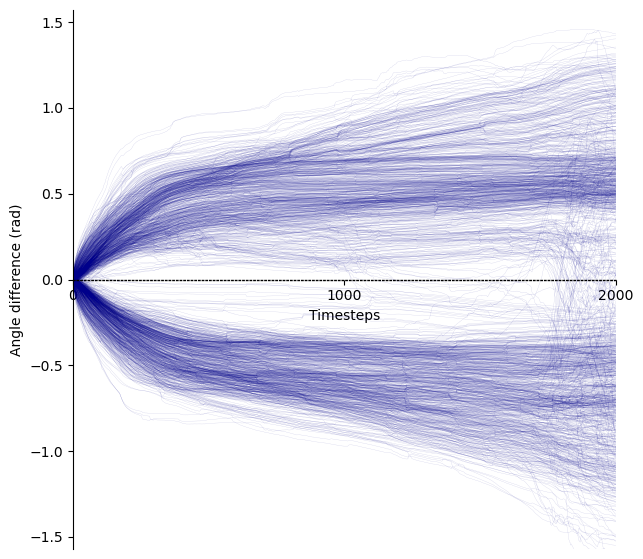

In [108]:
fig = plt.figure(figsize= (7,7))

starts = theta[0,:]

trip = theta[:,:] - starts
# trip[:, np.abs(starts) > np.pi] +=2*np.pi

for i in range(1, len(trip)):
    too_large_step = np.abs(trip[i] - trip[i-1]) > np.pi

    dir = np.sign(trip[i, too_large_step] - trip[i-1, too_large_step])

    trip[i:, too_large_step] -= 2*np.pi*dir

plt.plot(trip, color = 'darkblue', alpha = 0.2, lw = 0.2) 

plt.xlabel('Timesteps')
plt.ylabel('Angle difference (rad)')

# remove the lower 

plt.ylim(-np.pi*0.5, np.pi*0.5)

sns.despine()


# move x-axis to the middle
# plt.gca().spines['left'].set_position('center')
# plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_position('center')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_linestyle('dotted')

plt.xticks([0, 1000, 2000, 3000,], [0, 1000, 2000, 3000,])

plt.xlim(0,2000)

plt.savefig('../../Figures/the_ring.png', dpi = 300)

plt.show()